<a href="https://colab.research.google.com/github/i23SebasRam/AprendiendoTensorFlow/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt

Importamos el dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full,Y_train_full),(X_test,Y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
Y_train_full.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
Y_test.shape

(10000,)

Realizamos un split de los datos, para realizar una seccion de validacion de un tamaño de 5000 datos.

In [8]:
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
Y_val, Y_train = Y_train_full[:5000], Y_train_full[5000:]

In [9]:
class_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

Inicializamos la red neuronal.

In [10]:
model = keras.models.Sequential()
#Capa para canviar el vector de llegada 2D a un vector 1D, no tiene parametros ni pesos ni nada.
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [11]:
#Otra forma de hacerlo es creando las capas de una vez en el model.

model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation="relu"),
        keras.layers.Dense(100,activation="relu"),
        keras.layers.Dense(10,activation="softmax")                             
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer('dense_3') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()


#Vamos a compilar el modelo.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

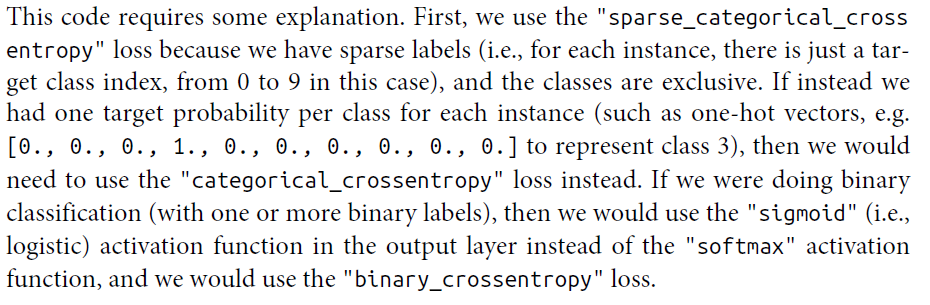

#Entrenamiento del modelo.

In [19]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0100 - accuracy: 0.6754 - val_loss: 0.4980 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5014 - accuracy: 0.8227 - val_loss: 0.4376 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8450 - val_loss: 0.4296 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4105 - accuracy: 0.8559 - val_loss: 0.3905 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8603 - val_loss: 0.4089 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3721 - accuracy: 0.8694 - val_loss: 0.3651 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8704 - val_loss: 0.3528 - val_accuracy:

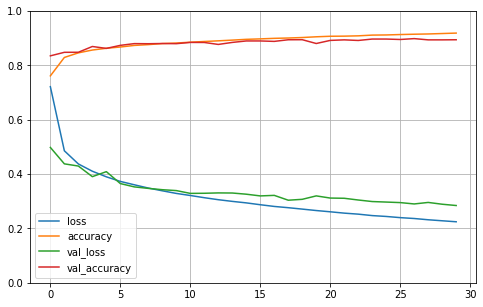

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2200 - accuracy: 0.9214 - val_loss: 0.3207 - val_accuracy: 0.8864
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2172 - accuracy: 0.9212 - val_loss: 0.2868 - val_accuracy: 0.8986
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2139 - accuracy: 0.9227 - val_loss: 0.2916 - val_accuracy: 0.8934
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2112 - accuracy: 0.9241 - val_loss: 0.3088 - val_accuracy: 0.8902
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2072 - accuracy: 0.9260 - val_loss: 0.2791 - val_accuracy: 0.8972
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2037 - accuracy: 0.9278 - val_loss: 0.3100 - val_accuracy: 0.8870
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9281 - val_loss: 0.3063 - val_accuracy:

#Evaluacion del modelo que creamos con los datos de test.


In [28]:
model.evaluate(X_test,Y_test)

(10000,)
313/313 [==============================] - 1s 2ms/step - loss: 66.9460 - accuracy: 0.8515


[66.94600677490234, 0.8514999747276306]